# Python
There are two major versions of Python (2 and 3). While most projects and new developers are using 3, a number of tooboxes still have not been converted and even a few major players like Google and Kitware (Slicer, Paraview) are still using version 2. My recommendation would be to start using Python 3 but to write in a backwards compatible manner. 

Here we start with a python notebook. The very first lines of a python script or notebook need to be the ```___future___``` commands since they change they way the rest of the lines are interpreted. The future commands are very important because they cause python 2 to behave more like python 3. The lines will be ignored in python 3. These two commands you should include in every file or notebook. 
### print_function
The print_function forces you to type ```print('hello')``` instead of ```print 'hello'``` the former works in both 2 and 3 while the later only works in 2.
### division
This is very important and causes division of two round (integer) numbers to return a decimal (float) instead of a round number. If it is turned off
```
>>> 3/4
0
```
if it is turned on 
```
>>> from __future__ import division
>>> 3/4
0.75
```

In [1]:
from __future__ import print_function, division

# Numpy
Numpy is a package for efficiently dealing with vector and matrix data. It has a high degree of similiarity to Matlab. We typically import the package as ```np``` since this is shorter to type 

In [2]:
import numpy as np
# make a 3,3 array with ones in every position
np.ones((3,3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [43]:
a = np.arange(0, 25) # create a vector from 0 to 24
print('a',a)

a [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [44]:
b = a.reshape((5,5)) # shape the array into a 5x5 matrix instead of a vector
print('b_shape', b.shape) # each numpy array has a property called shape which gives you the dimensions
print('b',b)

b_shape (5, 5)
b [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


# Plots and figures with Matplotlib
Matplotlib is a very helpful library for plotting graphs and displaying images. It is built to resemble to plotting tools in Matlab (hence the name). Typically we will load the ```pyplot``` sub-package and abbreviate it as ```plt``` this is done by a modified import command


In [5]:
import matplotlib.pyplot as plt
# we can now show all the functions in plt by using the dir command. 
# The ones relevant for us are subplot and imshow
print(','.join(dir(plt)))

Annotation,Arrow,Artist,AutoLocator,Axes,Button,Circle,Figure,FigureCanvasBase,FixedFormatter,FixedLocator,FormatStrFormatter,Formatter,FuncFormatter,GridSpec,IndexLocator,Line2D,LinearLocator,Locator,LogFormatter,LogFormatterExponent,LogFormatterMathtext,LogLocator,MaxNLocator,MultipleLocator,Normalize,NullFormatter,NullLocator,PolarAxes,Polygon,Rectangle,ScalarFormatter,Slider,Subplot,SubplotTool,Text,TickHelper,Widget,_INSTALL_FIG_OBSERVER,_IP_REGISTERED,__builtins__,__cached__,__doc__,__file__,__loader__,__name__,__package__,__spec__,_auto_draw_if_interactive,_autogen_docstring,_backend_mod,_backend_selection,_imread,_imsave,_interactive_bk,_pylab_helpers,_setp,_setup_pyplot_info_docstrings,_show,_string_to_bool,absolute_import,acorr,angle_spectrum,annotate,arrow,autoscale,autumn,axes,axhline,axhspan,axis,axvline,axvspan,bar,barbs,barh,bone,box,boxplot,broken_barh,cla,clabel,clf,clim,close,cm,cohere,colorbar,colormaps,colors,connect,contour,contourf,cool,copper,csd,cycler,dedent,de

## Notes and Magic
The ```%matplotlib inline``` command is for use inside of Jupyter notebooks to show the figures in the notebook instead of opening a new figure window (the default when using python from the command line). Commands that start with a % are not normal python and are so-called _magic_ commands. They are just for use inside of jupyter notebooks. Another very useful magic command is ```%%time``` to show how long a time took to execute

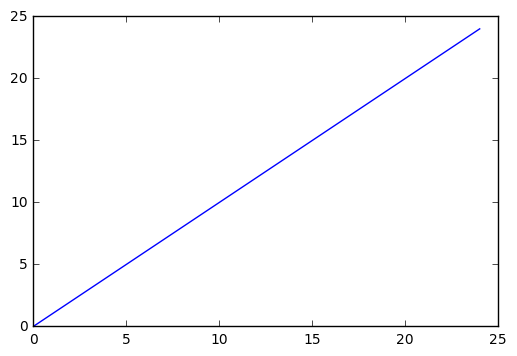

In [6]:
%matplotlib inline
plt.plot(a)

### Histogram
We can also make a histogram using matplotlib using the ```hist``` function.

(array([ 5.,  5.,  5.,  5.,  5.]),
 array([  0. ,   4.8,   9.6,  14.4,  19.2,  24. ]),
 <a list of 5 Patch objects>)

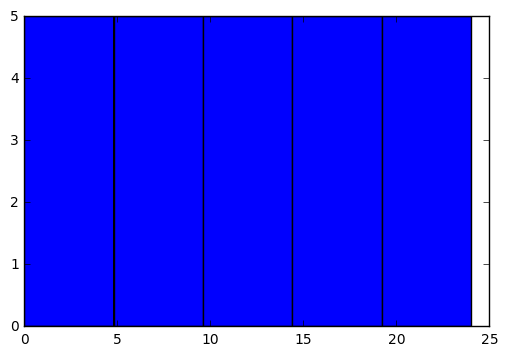

In [7]:
plt.hist(a, bins = 5)

(array([   2.,    5.,   29.,   92.,  187.,  252.,  217.,  143.,   55.,   18.]),
 array([-92.4660141 , -76.45487858, -60.44374307, -44.43260755,
        -28.42147204, -12.41033652,   3.60079899,  19.61193451,
         35.62307002,  51.63420554,  67.64534105]),
 <a list of 10 Patch objects>)

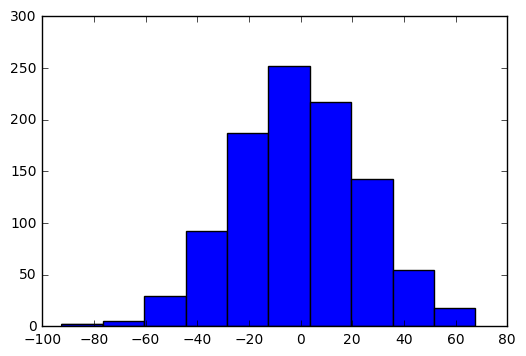

In [8]:
# since that was a really boring histogram, we can make a normal distribution with 1000 points
norm_dist = np.random.normal(0, 25, size=(1000))
plt.hist(norm_dist, bins = 10)

# Showing Images
Images can be shown using the ```imshow``` or ```matshow``` commands in ```plt```, for the most part we will focus on using the ```imshow``` command

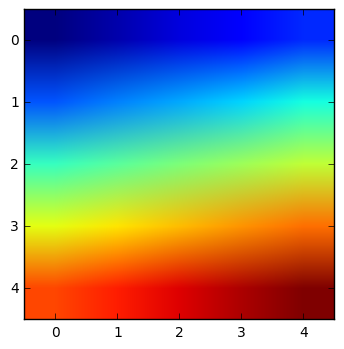

In [9]:
plt.imshow(b)

The we know the image should be 25 pixels ranging between 0 and 25 but it shows up as a nice smooth graphic, did we do something wrong?

- Yes, the default settings of matplotlib sometimes have the interpolation parameter set to something that makes the images appear higher resolution or smoother than the really are. We want to make sure that we show the image with this set to 'none'

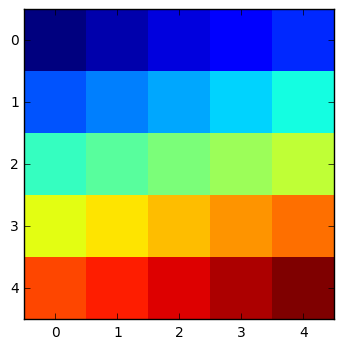

In [10]:
plt.imshow(b, interpolation = 'none')

# Show an image
Here we start to use the scikit-image (_skimage_) package. The package includes some test images to make getting started a bit easier

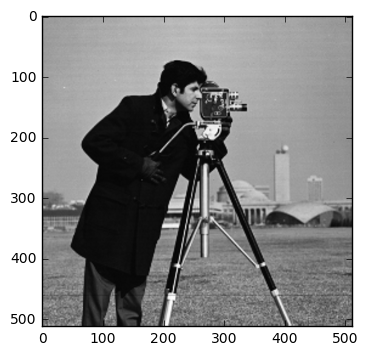

In [11]:
from skimage import data
image = data.camera() # get the camera image from the scikit-image data
plt.imshow(image, 
           cmap=plt.cm.gray) # we use a grayscale ma

# Controlling Figures
We see the figure looks fine, but if we want to give it a title and turn off the axes, we need to learn a bit more about the plot settings

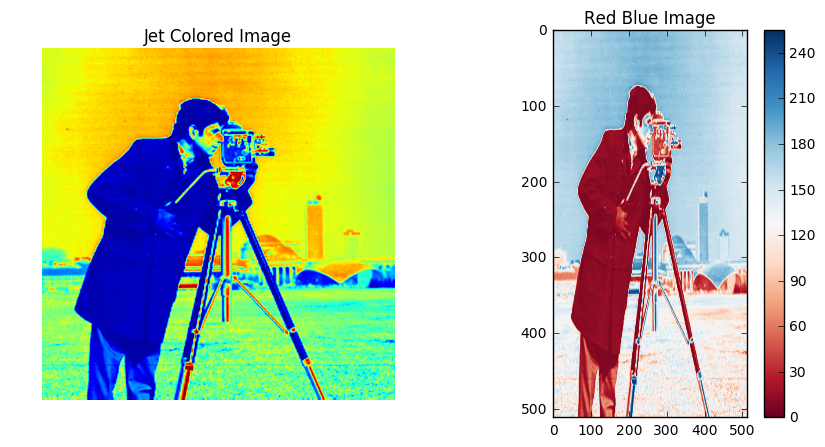

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5)) # make a new subplot figure with 2 axes
ax1.imshow(image, cmap=plt.cm.jet) # we can use a different color mapping scheme like jet (matlab's default)
ax1.set_title('Jet Colored Image')
ax1.axis('off') # turn off the axes lines

img1_ax = ax2.imshow(image, cmap = 'RdBu') # you can also specifiy color maps by name
ax2.set_title('Red Blue Image')
ax2.set_aspect(2) # change the aspect ratio to 2:1
plt.colorbar(img1_ax) # show a color bar for the second image only


# Thresholding


Thresholding is used to create a binary image from a grayscale image [1]_.

.. [1] https://en.wikipedia.org/wiki/Thresholding_%28image_processing%29

.. seealso::
    A more comprehensive presentation on
    `sphx_glr_auto_examples_xx_applications_plot_thresholding.py`




We illustrate how to apply one of these thresholding algorithms.
Otsu's method [2]_ calculates an "optimal" threshold (marked by a red line in the
histogram below) by maximizing the variance between two classes of pixels,
which are separated by the threshold. Equivalently, this threshold minimizes
the intra-class variance.

.. [2] http://en.wikipedia.org/wiki/Otsu's_method




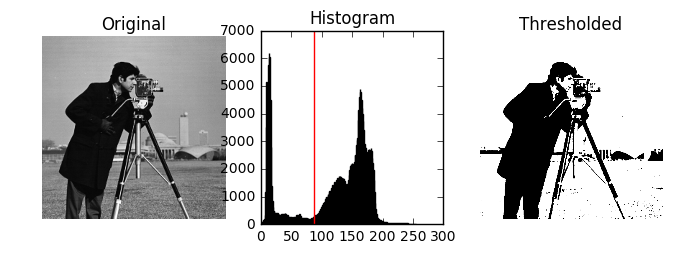

In [13]:
from skimage.filters import threshold_otsu


image = data.camera()
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1, adjustable='box-forced')
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0], adjustable='box-forced')

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

If you are not familiar with the details of the different algorithms and the
underlying assumptions, it is often difficult to know which algorithm will give
the best results. Therefore, Scikit-image includes a function to evaluate
thresholding algorithms provided by the library. At a glance, you can select
the best algorithm for you data without a deep understanding of their
mechanisms.




In [41]:
try:
    from skimage.filters import try_all_threshold

    img = data.page()

    # Here, we specify a radius for local thresholding algorithms.
    # If it is not specified, only global algorithms are called.
    fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
    plt.show()
except ImportError:
    from warnings import warn
    warn('The current version of skimage does not support this feature, sorry', RuntimeWarning)

/Users/mader/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: RuntimeWarning: The current version of skimage does not support this feature, sorry


# Morphological Filtering


Morphological image processing is a collection of non-linear operations related
to the shape or morphology of features in an image, such as boundaries,
skeletons, etc. In any given technique, we probe an image with a small shape or
template called a structuring element, which defines the region of interest or
neighborhood around a pixel.

In this document we outline the following basic morphological operations:

1. Erosion
2. Dilation
3. Opening
4. Closing
5. White Tophat
6. Black Tophat
7. Skeletonize
8. Convex Hull


To get started, let's load an image using ``io.imread``. Note that morphology
functions only work on gray-scale or binary images, so we set ``as_grey=True``.

/Users/mader/anaconda/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


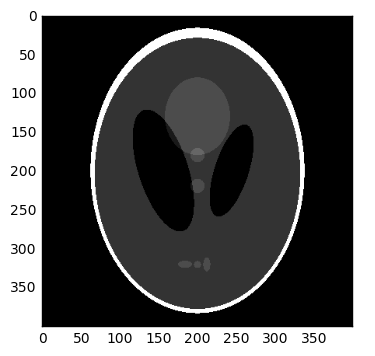

In [19]:
import os
from skimage.data import data_dir
from skimage.util import img_as_ubyte
from skimage import io

orig_phantom = img_as_ubyte(io.imread(os.path.join(data_dir, "phantom.png"),
                                      as_grey=True))
fig, ax = plt.subplots()
ax.imshow(orig_phantom, cmap=plt.cm.gray)

Let's also define a convenience function for plotting comparisons:


In [20]:
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax1.set_adjustable('box-forced')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    ax2.set_adjustable('box-forced')

Erosion
=======

Morphological ``erosion`` sets a pixel at (i, j) to the *minimum over all
pixels in the neighborhood centered at (i, j)*. The structuring element,
``selem``, passed to ``erosion`` is a boolean array that describes this
neighborhood. Below, we use ``disk`` to create a circular structuring
element, which we use for most of the following examples.


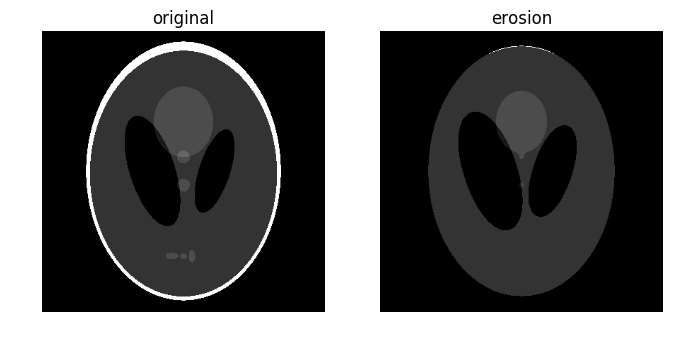

In [21]:
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat 
from skimage.morphology import disk

selem = disk(6)
eroded = erosion(orig_phantom, selem)
plot_comparison(orig_phantom, eroded, 'erosion')

Notice how the white boundary of the image disappears or gets eroded as we
 increase the size of the disk. Also notice the increase in size of the two
 black ellipses in the center and the disappearance of the 3 light grey
 patches in the lower part of the image.

Dilation
========

Morphological ``dilation`` sets a pixel at (i, j) to the *maximum over all
pixels in the neighborhood centered at (i, j)*. Dilation enlarges bright
regions and shrinks dark regions.

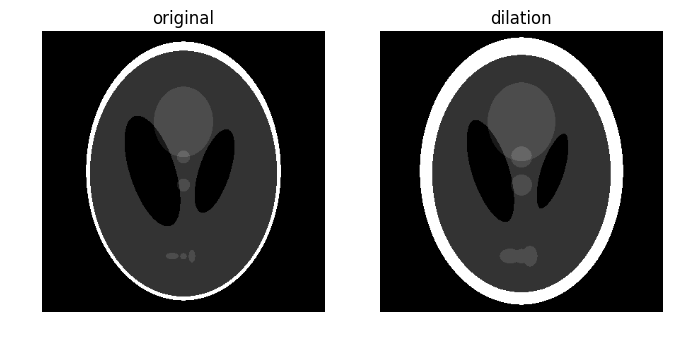

In [22]:
dilated = dilation(orig_phantom, selem)
plot_comparison(orig_phantom, dilated, 'dilation')

Notice how the white boundary of the image thickens, or gets dilated, as we
increase the size of the disk. Also notice the decrease in size of the two
black ellipses in the centre, and the thickening of the light grey circle
in the center and the 3 patches in the lower part of the image.

Opening
=======

Morphological ``opening`` on an image is defined as an *erosion followed by
a dilation*. Opening can remove small bright spots (i.e. "salt") and
connect small dark cracks.

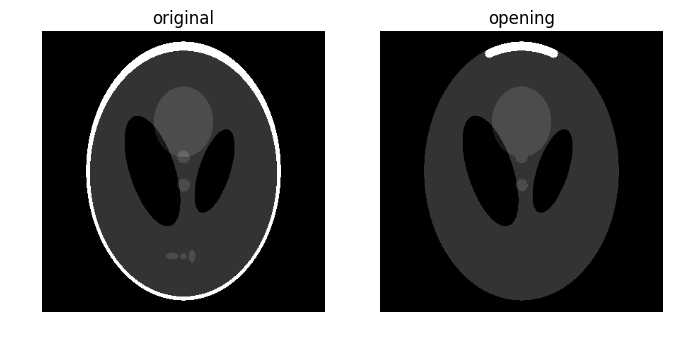

In [23]:
opened = opening(orig_phantom, selem)
plot_comparison(orig_phantom, opened, 'opening')

Since ``opening`` an image starts with an erosion operation, light regions
that are *smaller* than the structuring element are removed. The dilation
operation that follows ensures that light regions that are *larger* than
the structuring element retain their original size. Notice how the light
and dark shapes in the center their original thickness but the 3 lighter
patches in the bottom get completely eroded. The size dependence is
highlighted by the outer white ring: The parts of the ring thinner than the
structuring element were completely erased, while the thicker region at the
top retains its original thickness.

Closing
=======

Morphological ``closing`` on an image is defined as a *dilation followed by
an erosion*. Closing can remove small dark spots (i.e. "pepper") and
connect small bright cracks.

To illustrate this more clearly, let's add a small crack to the white
border:

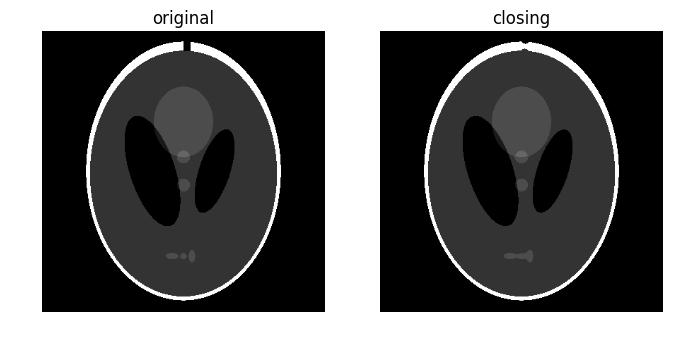

In [24]:
phantom = orig_phantom.copy()
phantom[10:30, 200:210] = 0

closed = closing(phantom, selem)
plot_comparison(phantom, closed, 'closing')

Since ``closing`` an image starts with an dilation operation, dark regions
that are *smaller* than the structuring element are removed. The dilation
operation that follows ensures that dark regions that are *larger* than the
structuring element retain their original size. Notice how the white
ellipses at the bottom get connected because of dilation, but other dark
region retain their original sizes. Also notice how the crack we added is
mostly removed.

White tophat
============

The ``white_tophat`` of an image is defined as the *image minus its
morphological opening*. This operation returns the bright spots of the
image that are smaller than the structuring element.

To make things interesting, we'll add bright and dark spots to the image:

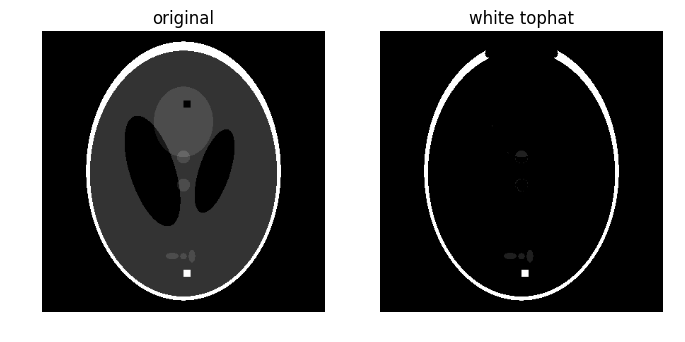

In [25]:
phantom = orig_phantom.copy()
phantom[340:350, 200:210] = 255
phantom[100:110, 200:210] = 0

w_tophat = white_tophat(phantom, selem)
plot_comparison(phantom, w_tophat, 'white tophat')

As you can see, the 10-pixel wide white square is highlighted since it is
smaller than the structuring element. Also, the thin, white edges around
most of the ellipse are retained because they're smaller than the
structuring element, but the thicker region at the top disappears.

Black tophat
============

The ``black_tophat`` of an image is defined as its morphological **closing
minus the original image**. This operation returns the *dark spots of the
image that are smaller than the structuring element*.

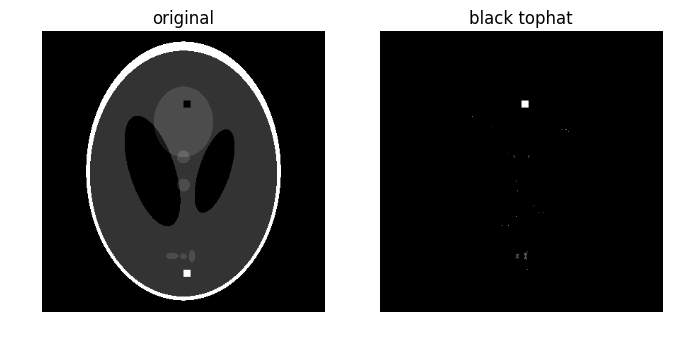

In [26]:
b_tophat = black_tophat(phantom, selem)
plot_comparison(phantom, b_tophat, 'black tophat')


# Canny edge detector


The Canny filter is a multi-stage edge detector. It uses a filter based on the
derivative of a Gaussian in order to compute the intensity of the gradients.The
Gaussian reduces the effect of noise present in the image. Then, potential
edges are thinned down to 1-pixel curves by removing non-maximum pixels of the
gradient magnitude. Finally, edge pixels are kept or removed using hysteresis
thresholding on the gradient magnitude.

The Canny has three adjustable parameters: the width of the Gaussian (the
noisier the image, the greater the width), and the low and high threshold for
the hysteresis thresholding.





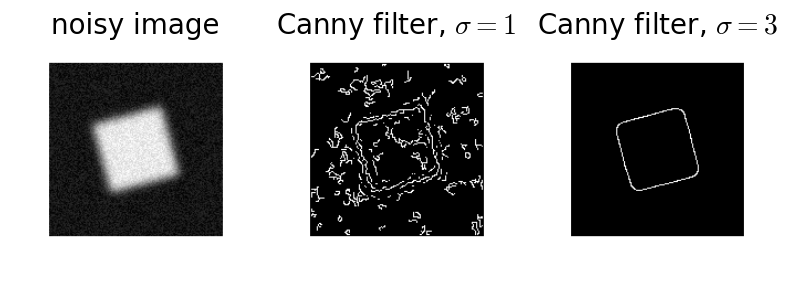

In [27]:
from scipy import ndimage as ndi
from skimage import feature


# Generate noisy image of a square
im = np.zeros((128, 128))
im[32:-32, 32:-32] = 1

im = ndi.rotate(im, 15, mode='constant')
im = ndi.gaussian_filter(im, 4)
im += 0.2 * np.random.random(im.shape)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()


# Filtering regional maxima


Here, we use morphological reconstruction to create a background image, which
we can subtract from the original image to isolate bright features (regional
maxima).

First we try reconstruction by dilation starting at the edges of the image. We
initialize a seed image to the minimum intensity of the image, and set its
border to be the pixel values in the original image. These maximal pixels will
get dilated in order to reconstruct the background image.


In [28]:
from scipy.ndimage import gaussian_filter
from skimage import img_as_float
from skimage.morphology import reconstruction

# Convert to float: Important for subtraction later which won't work with uint8
image = img_as_float(data.coins())
image = gaussian_filter(image, 1)

seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
mask = image

dilated = reconstruction(seed, mask, method='dilation')

Subtracting the dilated image leaves an image with just the coins and a
flat, black background, as shown below.

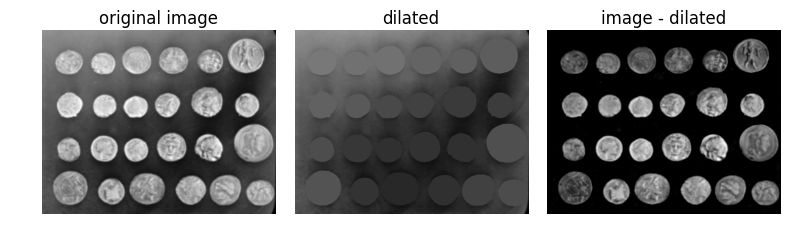

In [29]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                    ncols=3,
                                    figsize=(8, 2.5),
                                    sharex=True,
                                    sharey=True)

ax0.imshow(image, cmap='gray')
ax0.set_title('original image')
ax0.axis('off')
ax0.set_adjustable('box-forced')

ax1.imshow(dilated, vmin=image.min(), vmax=image.max(), cmap='gray')
ax1.set_title('dilated')
ax1.axis('off')
ax1.set_adjustable('box-forced')

ax2.imshow(image - dilated, cmap='gray')
ax2.set_title('image - dilated')
ax2.axis('off')
ax2.set_adjustable('box-forced')

fig.tight_layout()

Although the features (i.e. the coins) are clearly isolated, the coins
surrounded by a bright background in the original image are dimmer in the
subtracted image. We can attempt to correct this using a different seed
image.

Instead of creating a seed image with maxima along the image border, we can
use the features of the image itself to seed the reconstruction process.
Here, the seed image is the original image minus a fixed value, ``h``.


In [30]:
h = 0.4
seed = image - h
dilated = reconstruction(seed, mask, method='dilation')
hdome = image - dilated

To get a feel for the reconstruction process, we plot the intensity of the
mask, seed, and dilated images along a slice of the image (indicated by red
line).

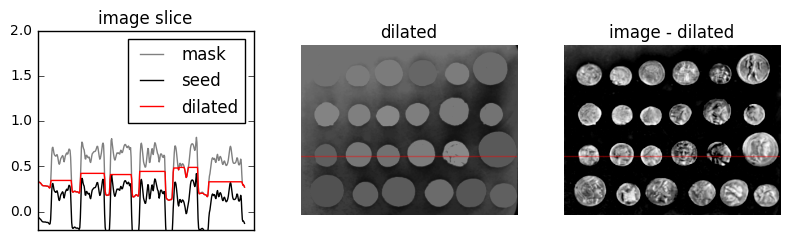

In [31]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(8, 2.5))
yslice = 197

ax0.plot(mask[yslice], '0.5', label='mask')
ax0.plot(seed[yslice], 'k', label='seed')
ax0.plot(dilated[yslice], 'r', label='dilated')
ax0.set_ylim(-0.2, 2)
ax0.set_title('image slice')
ax0.set_xticks([])
ax0.legend()

ax1.imshow(dilated, vmin=image.min(), vmax=image.max(), cmap='gray')
ax1.axhline(yslice, color='r', alpha=0.4)
ax1.set_title('dilated')
ax1.axis('off')

ax2.imshow(hdome, cmap='gray')
ax2.axhline(yslice, color='r', alpha=0.4)
ax2.set_title('image - dilated')
ax2.axis('off')

fig.tight_layout()
plt.show()

As you can see in the image slice, each coin is given a different baseline
intensity in the reconstructed image; this is because we used the local
intensity (shifted by ``h``) as a seed value. As a result, the coins in the
subtracted image have similar pixel intensities. The final result is known
as the h-dome of an image since this tends to isolate regional maxima of
height ``h``. This operation is particularly useful when your images are
unevenly illuminated.

# Advanced Topics
These are above and beyond the topics we have covered but could be interesting for some students and show some of the functionality.


# Contour finding


We use a marching squares method to find constant valued contours in an image.
In ``skimage.measure.find_contours``, array values are linearly interpolated
to provide better precision of the output contours. Contours which intersect
the image edge are open; all others are closed.

The `marching squares algorithm
<http://www.essi.fr/~lingrand/MarchingCubes/algo.html>`__ is a special case of
the marching cubes algorithm (Lorensen, William and Harvey E. Cline. Marching
Cubes: A High Resolution 3D Surface Construction Algorithm. Computer Graphics
(SIGGRAPH 87 Proceedings) 21(4) July 1987, p. 163-170).


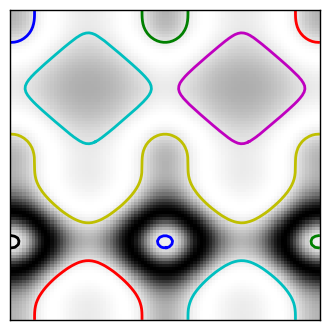

In [32]:
from skimage import measure


# Construct some test data
x, y = np.ogrid[-np.pi:np.pi:100j, -np.pi:np.pi:100j]
r = np.sin(np.exp((np.sin(x)**3 + np.cos(y)**2)))

# Find contours at a constant value of 0.8
contours = measure.find_contours(r, 0.8)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(r, interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()


# Watershed segmentation


The watershed is a classical algorithm used for **segmentation**, that
is, for separating different objects in an image.

Starting from user-defined markers, the watershed algorithm treats
pixels values as a local topography (elevation). The algorithm floods
basins from the markers, until basins attributed to different markers
meet on watershed lines.  In many cases, markers are chosen as local
minima of the image, from which basins are flooded.

In the example below, two overlapping circles are to be separated. To
do so, one computes an image that is the distance to the
background. The maxima of this distance (i.e., the minima of the
opposite of the distance) are chosen as markers, and the flooding of
basins from such markers separates the two circles along a watershed
line.

See Wikipedia_ for more details on the algorithm.


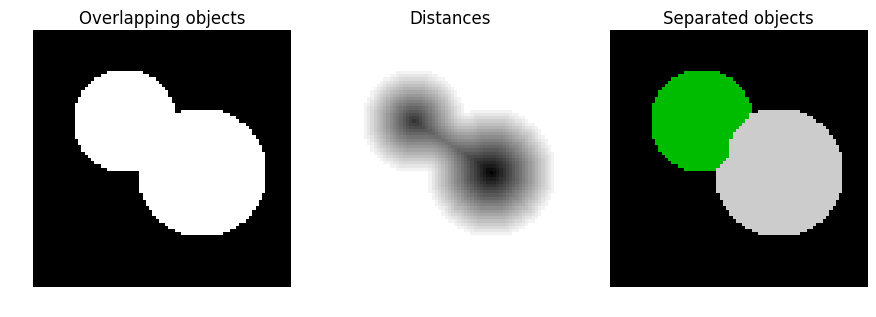

In [33]:
from skimage.morphology import watershed
from skimage.feature import peak_local_max


# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                            labels=image)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.spectral, interpolation='nearest')
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()


# Markers for watershed transform


The watershed is a classical algorithm used for **segmentation**, that
is, for separating different objects in an image.

Here a marker image is built from the region of low gradient inside the image.
In a gradient image, the areas of high values provide barriers that help to
segment the image.
Using markers on the lower values will ensure that the segmented objects are
found.

See Wikipedia_ for more details on the algorithm.


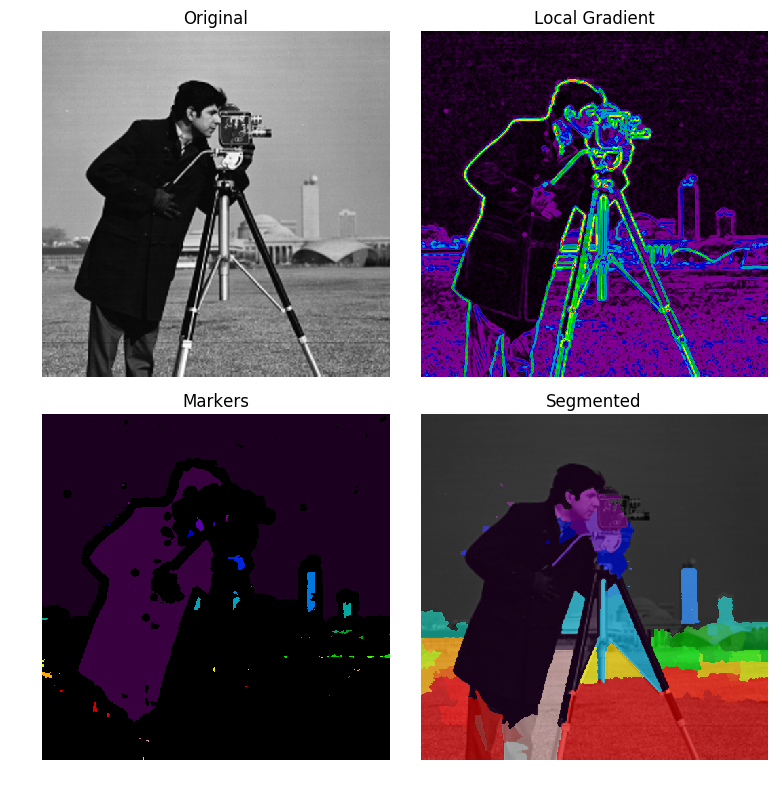

In [34]:
from skimage.filters import rank

image = img_as_ubyte(data.camera())

# denoise image
denoised = rank.median(image, disk(2))

# find continuous region (low gradient -
# where less than 10 for this image) --> markers
# disk(5) is used here to get a more smooth image
markers = rank.gradient(denoised, disk(5)) < 10
markers = ndi.label(markers)[0]

# local gradient (disk(2) is used to keep edges thin)
gradient = rank.gradient(denoised, disk(2))

# process the watershed
labels = watershed(gradient, markers)

# display results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'})
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title("Original")

ax[1].imshow(gradient, cmap=plt.cm.spectral, interpolation='nearest')
ax[1].set_title("Local Gradient")

ax[2].imshow(markers, cmap=plt.cm.spectral, interpolation='nearest')
ax[2].set_title("Markers")

ax[3].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[3].imshow(labels, cmap=plt.cm.spectral, interpolation='nearest', alpha=.7)
ax[3].set_title("Segmented")

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

# Reconstruction Algorithms
Here is a brief introduction to reconstruction algorithms. The following examples are from X-ray tomography but can be applied in other areas.


# Radon transform


In computed tomography, the tomography reconstruction problem is to obtain
a tomographic slice image from a set of projections [1]_. A projection is
formed by drawing a set of parallel rays through the 2D object of interest,
assigning the integral of the object's contrast along each ray to a single
pixel in the projection. A single projection of a 2D object is one dimensional.
To enable computed tomography reconstruction of the object, several projections
must be acquired, each of them corresponding to a different angle between the
rays with respect to the object. A collection of projections at several angles
is called a sinogram, which is a linear transform of the original image.

The inverse Radon transform is used in computed tomography to reconstruct
a 2D image from the measured projections (the sinogram). A practical, exact
implementation of the inverse Radon transform does not exist, but there are
several good approximate algorithms available.

As the inverse Radon transform reconstructs the object from a set of
projections, the (forward) Radon transform can be used to simulate a
tomography experiment.

This script performs the Radon transform to simulate a tomography experiment
and reconstructs the input image based on the resulting sinogram formed by
the simulation. Two methods for performing the inverse Radon transform
and reconstructing the original image are compared: The Filtered Back
Projection (FBP) and the Simultaneous Algebraic Reconstruction
Technique (SART).

For further information on tomographic reconstruction, see

.. [1] AC Kak, M Slaney, "Principles of Computerized Tomographic Imaging",
       IEEE Press 1988. http://www.slaney.org/pct/pct-toc.html

.. [2] Wikipedia, Radon transform,
       http://en.wikipedia.org/wiki/Radon_transform#Relationship_with_the_Fourier_transform

.. [3] S Kaczmarz, "Angenaeherte Aufloesung von Systemen linearer
       Gleichungen", Bulletin International de l'Academie Polonaise
       des Sciences et des Lettres, 35 pp 355--357 (1937)

.. [4] AH Andersen, AC Kak, "Simultaneous algebraic reconstruction
       technique (SART): a superior implementation of the ART algorithm",
       Ultrasonic Imaging 6 pp 81--94 (1984)

The forward transform
=====================

As our original image, we will use the Shepp-Logan phantom. When calculating
the Radon transform, we need to decide how many projection angles we wish
to use. As a rule of thumb, the number of projections should be about the
same as the number of pixels there are across the object (to see why this
is so, consider how many unknown pixel values must be determined in the
reconstruction process and compare this to the number of measurements
provided by the projections), and we follow that rule here. Below is the
original image and its Radon transform, often known as its *sinogram*:




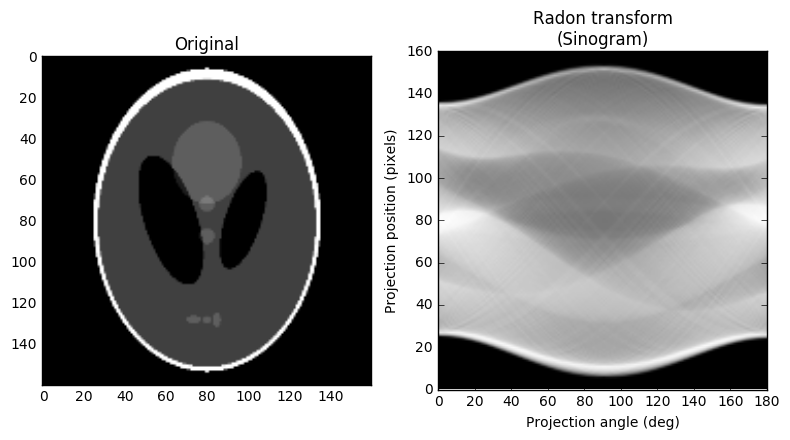

In [36]:
from skimage.transform import radon, rescale

image = io.imread(data_dir + "/phantom.png", as_grey=True)
image = rescale(image, scale=0.4, mode='reflect')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(image, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta, circle=True)
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')

fig.tight_layout()
plt.show()

Reconstruction with the Filtered Back Projection (FBP)
======================================================

The mathematical foundation of the filtered back projection is the Fourier
slice theorem [2]_. It uses Fourier transform of the projection and
interpolation in Fourier space to obtain the 2D Fourier transform of the
image, which is then inverted to form the reconstructed image. The filtered
back projection is among the fastest methods of performing the inverse
Radon transform. The only tunable parameter for the FBP is the filter,
which is applied to the Fourier transformed projections. It may be used to
suppress high frequency noise in the reconstruction. ``skimage`` provides a
few different options for the filter.




FBP rms reconstruction error: 0.0393


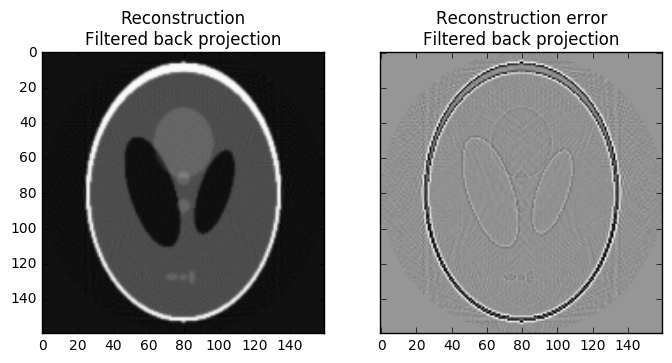

In [37]:
from skimage.transform import iradon

reconstruction_fbp = iradon(sinogram, theta=theta, circle=True)
error = reconstruction_fbp - image
print('FBP rms reconstruction error: %.3g' % np.sqrt(np.mean(error**2)))

imkwargs = dict(vmin=-0.2, vmax=0.2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5),
                               sharex=True, sharey=True,
                               subplot_kw={'adjustable': 'box-forced'})
ax1.set_title("Reconstruction\nFiltered back projection")
ax1.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
ax2.set_title("Reconstruction error\nFiltered back projection")
ax2.imshow(reconstruction_fbp - image, cmap=plt.cm.Greys_r, **imkwargs)
plt.show()